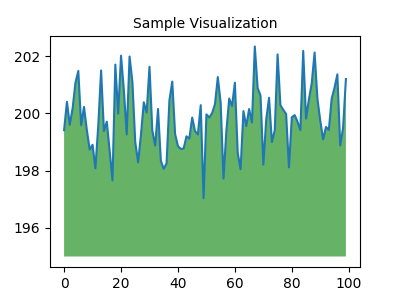

In [2]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

In [3]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# Ignore warnings for cleaner output
warnings.filterwarnings("ignore")


In [4]:
# Load the dataset
df = pd.read_csv("medical_insurance.csv")


In [5]:
# Display dataset info
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       21 non-null     int64  
 1   sex       21 non-null     object 
 2   bmi       21 non-null     float64
 3   children  21 non-null     int64  
 4   smoker    21 non-null     object 
 5   region    21 non-null     object 
 6   charges   21 non-null     float64
dtypes: float64(2), int64(2), object(3)
memory usage: 1.3+ KB
None


In [6]:
# Check for missing values
print(df.isna().sum())


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [7]:
df['sex'].replace({"male": 0, "female": 1}, inplace=True)
sex_value = {"female": 1, "male": 0}
print("Sex Value Encoding:", sex_value)


Sex Value Encoding: {'female': 1, 'male': 0}


In [8]:
df['smoker'].replace({"yes": 0, "no": 1}, inplace=True)
smoker_value = {"no": 1, "yes": 0}
print("Smoker Value Encoding:", smoker_value)


Smoker Value Encoding: {'no': 1, 'yes': 0}


In [9]:
# Convert 'region' column into dummy variables (one-hot encoding)
df = pd.get_dummies(df, columns=['region'])
print(df.head())


   age  sex     bmi  children  smoker   charges  region_northeast  \
0   19    1  27.900         0       1  16884.92             False   
1   18    0  33.770         1       1   1725.55             False   
2   28    0  33.000         3       1   4449.46             False   
3   33    1  22.705         0       1  21984.47             False   
4   32    0  28.880         0       1   3866.86             False   

   region_northwest  region_southeast  region_southwest  
0             False             False              True  
1             False              True             False  
2             False              True             False  
3              True             False             False  
4              True             False             False  


In [10]:
# Define feature matrix (X) and target variable (y)
X = df.drop("charges", axis=1)  # Dropping the target variable 'charges'
y = df["charges"]  # Target variable


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
# Make predictions on the test set
y_pred = dt_reg.predict(X_test)


In [13]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [14]:

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 10362.132000000001
Mean Squared Error (MSE): 204733649.26456
Root Mean Squared Error (RMSE): 14308.51666891296
R² Score: -5.70789020724831


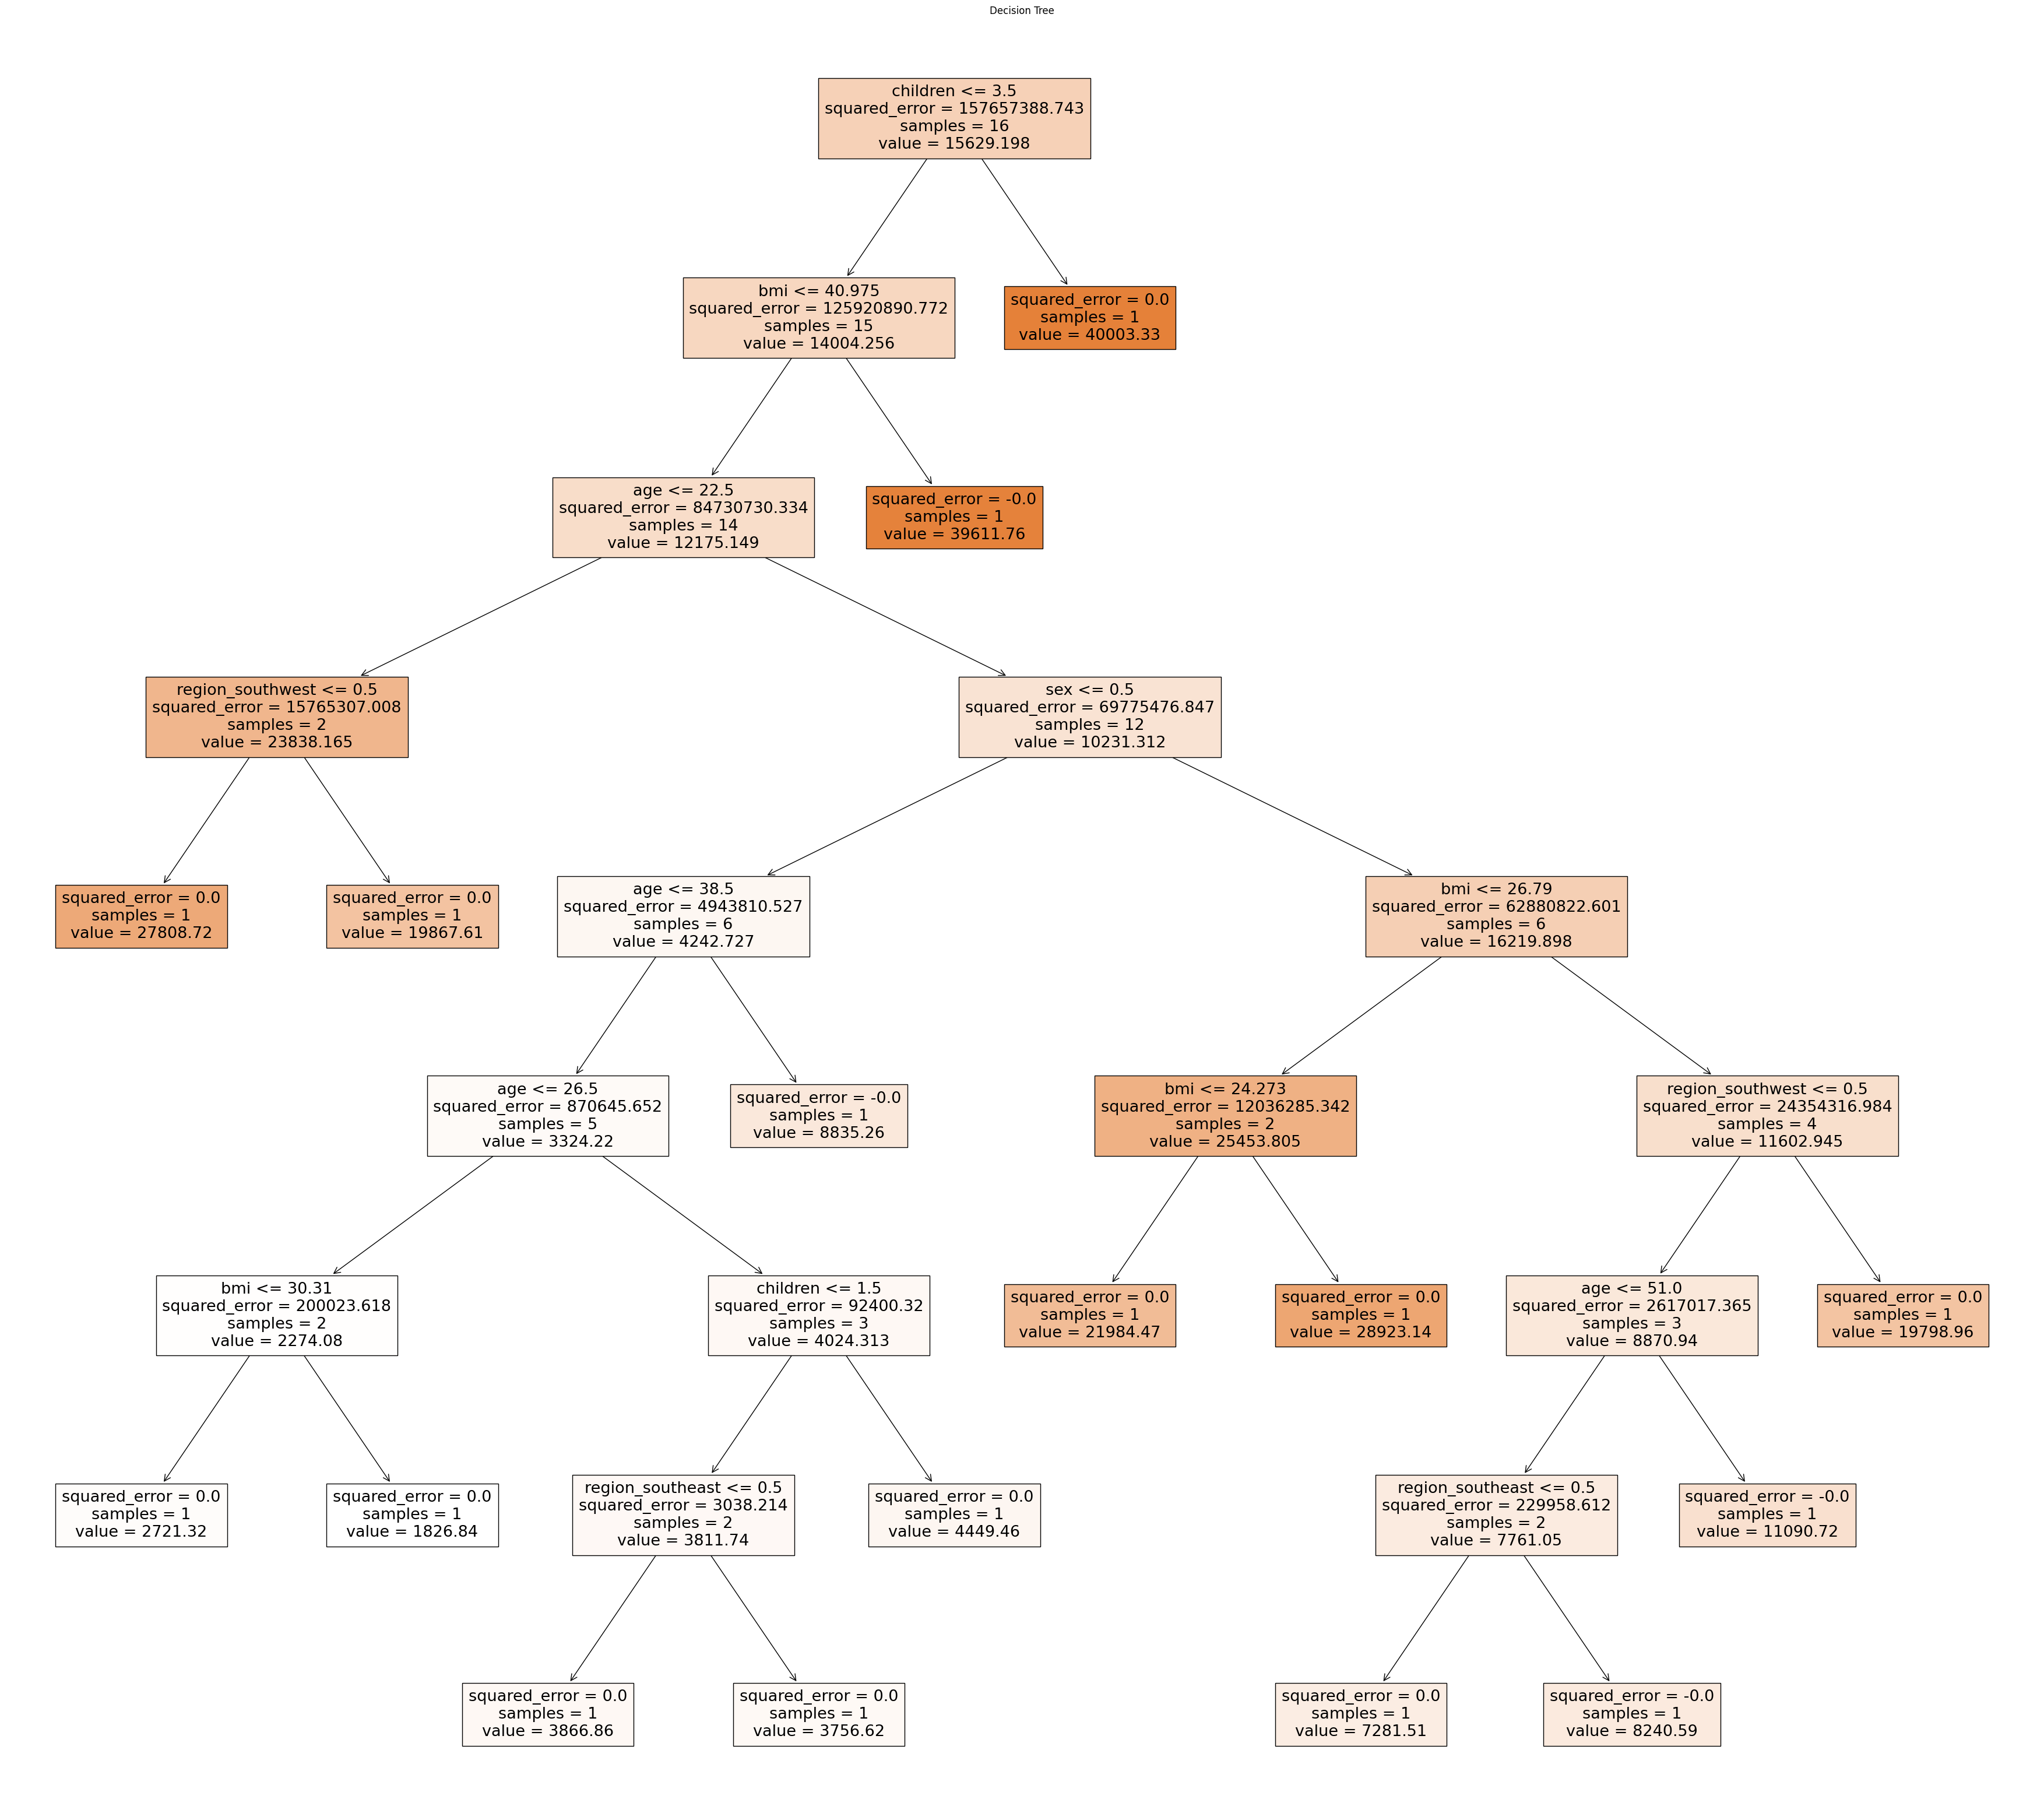

In [15]:
plt.figure(figsize=(45, 40))
plot_tree(dt_reg, filled=True, feature_names=X.columns)
plt.title("Decision Tree")
plt.show()


In [16]:
y_pred_train = dt_reg.predict(X_train)

mse_train = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error (Train) --->", mse_train)

mae_train = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error (Train) --->", mae_train)

rmse_train = np.sqrt(mse_train)
print("Root Mean Square Error (Train) --->", rmse_train)
r2_train = r2_score(y_train, y_pred_train)
print("R² Score (Train) --->", r2_train)

# Display feature column names
column_names = X.columns
print(column_names)


Mean Squared Error (Train) ---> 0.0
Mean Absolute Error (Train) ---> 0.0
Root Mean Square Error (Train) ---> 0.0
R² Score (Train) ---> 1.0
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')
